In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



# Data Loading

In [65]:
df = pd.read_csv("data.csv", encoding='cp1252')


In [66]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]

# Data Preprocessing

## Cek Tipe Data

In [67]:
df.info()
#str jadi object harusnya aman

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Cek null value

In [68]:
df.isnull().sum()
#ada beberapa yang hilangdi descroption dan customer id 

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [69]:
#hitung berapa persen yang null dari keseluruhan baris data
df.isnull().sum()/df.shape[0]*100
#kurang dari 50% jadi bisa di drop
#consider about the distirbution -> next

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

## Handle Missing Value
- Ada dua pilihan : pakai isi dengan hipotesisi bahwa stockcode value sebenarnya korelasi dengan description yang ada & customerid yang hilang atau null bisa saja karena kesalahan sistem jadi ada kesalahan sistem-> bisa saja indiivud yang sama di jam yang sama-sama sedang berbelanja tetapi tidak tercatat oleh sistem , atau memang orang baru customer id yang ternyata memang tidak terlihat. 
Note: ini berarti harus dibuktikan

In [70]:
df.InvoiceNo.nunique()

#invoice yang unik hnay aada 22190 sedangkan row ada sebanyak 541909, ini berarti memang untuk satu invoice bisa terdiri dari banyak pesanan
#dengan yang dikatan pada invoice no -> jika diawali dengan huruf C maka artinya di cancel pesannanya

25900

In [71]:
#cek seperti apa pattern dari stockcode
df.StockCode.value_counts().head(10)

#cek stock code yang depan nya huruf c
df[df.StockCode.str.contains('C', na=False)]

InvoiceNo StockCode                        Description  Quantity  \
87        536378    85099C     JUMBO  BAG BAROQUE BLACK WHITE        10   
91        536378    84997C  BLUE 3 PIECE POLKADOT CUTLERY SET         6   
121       536381    37444C     PINK BREAKFAST CUP AND SAUCER          1   
154      C536383    35004C    SET OF 3 COLOURED  FLYING DUCKS        -1   
176       536386    85099C     JUMBO  BAG BAROQUE BLACK WHITE       100   
...          ...       ...                                ...       ...   
540905    581492    90206C       CRYSTAL DIAMANTE STAR BROOCH         1   
541537    581498    85099C     JUMBO  BAG BAROQUE BLACK WHITE         4   
541649    581538    85071C  CHARLIE+LOLA"EXTREMELY BUSY" SIGN         1   
541778    581578    84997C    CHILDRENS CUTLERY POLKADOT BLUE         8   
541809    581579    85099C     JUMBO  BAG BAROQUE BLACK WHITE        10   

            InvoiceDate  UnitPrice  CustomerID         Country  
87       12/1/2010 9:37       1.95     14688.0  United Kingdom  
91       12/1/2010 9:37       3.75     14688.0  United Kingdom  
121      12/1/2010 9:41       2.95     15311.0  United Kingdom  
154      12/1/2010 9:49       4.65     15311.0  United Kingdom  
176      12/1/2010 9:57       1.65     16029.0  United Kingdom  
...                 ...        ...         ...             ...  
540905  12/9/2011 10:03       4.98         NaN  United Kingdom  
541537  12/9/2011 10:26       4.13         NaN  United Kingdom  
541649  12/9/2011 11:34       0.39     14446.0  United Kingdom  
541778  12/9/2011 12:16       4.15     12713.0         Germany  
541809  12/9/2011 12:19       1.79     17581.0  United Kingdom  

[6723 rows x 8 columns]

In [72]:
#Memasukkan data point yang di kolomnya terdapat null value maka masukkan ke df_null ini
df_null = df[df.isnull().any(axis=1)]
df_null

InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

            InvoiceDate  UnitPrice  CustomerID         Country  
622     12/1/2010 11:52       0.00         NaN  United Kingdom  
1443    12/1/2010 14:32       2.51         NaN  United Kingdom  
1444    12/1/2010 14:32       2.51         NaN  United Kingdom  
1445    12/1/2010 14:32       0.85         NaN  United Kingdom  
1446    12/1/2010 14:32       1.66         NaN  United Kingdom  
...                 ...        ...         ...             ...  
541536  12/9/2011 10:26       4.13         NaN  United Kingdom  
541537  12/9/2011 10:26       4.13         NaN  United Kingdom  
541538  12/9/2011 10:26       4.96         NaN  United Kingdom  
541539  12/9/2011 10:26      10.79         NaN  United Kingdom  
541540  12/9/2011 10:26    1714.17         NaN  United Kingdom  

[135080 rows x 8 columns]

# Hypotesis Pattern on Null Datas - Related to Record System

In [74]:
#dari sini terlihat patternya bahwa kalau 
#2177 0> itu berarti decorative ... bathroom bottle
# 2178 - berkiatan dengan rain stuff
#temuan : jika seluruh angka atau huruf di stockcode kecuali di angka atau huruf terakhir itu bisa dijadikan pattern untuk kesamaan 
#kalau dot -> itu dotcom postage 
#Ini berarti ada patternnya 
#Pertanyaan selanjutnya adalah apakah stockcode ini memang selalu pasangan unique dengan deskripsi, atau bisa saja untuk satu jenis descripsi berpasngant dengan beragam stockcode?
#Jika memang pasangan unik maka bisa diisi dengan menggunakan deskripsi yang sama dengan stockcode yang sama
#Jika tidak maka bisa diisi dengan menggunakan deskripsi yang paling sering muncul


In [75]:
#iterate untuk tiap stock code, apa isi deskirpsi yang mereka dapatkan -> buat dalam dictionary 
stock_code_description = {}
for stock_code in df.StockCode.unique():
    stock_code_description[stock_code] = df[df.StockCode == stock_code].Description.unique()


In [84]:
#jadikan dist menjadi dataframe terlebih dahulu , dan baru save di csv
# karena ga sama panjang isinya maka pakai cari maxnya 
# Cari panjang maksimum dari semua kolom
max_length = max(len(column) for column in stock_code_description.values())

# Fungsi buat perpanjang array 
def pad_array(arr, max_length):
    if len(arr) < max_length:
        return np.concatenate([arr, [np.nan] * (max_length - len(arr))])
    return arr

# Perpanjang setiap kolom yang lebih pendek dari panjang maksimum
for key in stock_code_description:
    stock_code_description[key] = pad_array(stock_code_description[key], max_length)

stock_code_description_df = pd.DataFrame(stock_code_description)

stock_code_description_df.to_csv("stock_code_description.csv", index=False)

# print(stock_code_description_df)

In [85]:
stock_code_description_df

85123A                         71053  \
0  WHITE HANGING HEART T-LIGHT HOLDER           WHITE METAL LANTERN   
1                                   ?  WHITE MOROCCAN METAL LANTERN   
2         wrongly marked carton 22804                           NaN   
3  CREAM HANGING HEART T-LIGHT HOLDER                           NaN   
4                                 NaN                           NaN   
5                                 NaN                           NaN   
6                                 NaN                           NaN   
7                                 NaN                           NaN   
8                                 NaN                           NaN   

                           84406B                               84029G  \
0  CREAM CUPID HEARTS COAT HANGER  KNITTED UNION FLAG HOT WATER BOTTLE   
1   incorrectly made-thrown away.                                  NaN   
2                               ?                                  NaN   
3                             NaN                                  NaN   
4                             NaN                                  NaN   
5                             NaN                                  NaN   
6                             NaN                                  NaN   
7                             NaN                                  NaN   
8                             NaN                                  NaN   

                           84029E                         22752  \
0  RED WOOLLY HOTTIE WHITE HEART.  SET 7 BABUSHKA NESTING BOXES   
1                             NaN                           NaN   
2                             NaN                           NaN   
3                             NaN                           NaN   
4                             NaN                           NaN   
5                             NaN                           NaN   
6                             NaN                           NaN   
7                             NaN                           NaN   
8                             NaN                           NaN   

                               21730                   22633  \
0  GLASS STAR FROSTED T-LIGHT HOLDER  HAND WARMER UNION JACK   
1                                NaN                     NaN   
2                                NaN                     NaN   
3                                NaN                     NaN   
4                                NaN                     NaN   
5                                NaN                     NaN   
6                                NaN                     NaN   
7                                NaN                     NaN   
8                                NaN                     NaN   

                       22632                          84879  ...  \
0  HAND WARMER RED POLKA DOT  ASSORTED COLOUR BIRD ORNAMENT  ...   
1  HAND WARMER RED RETROSPOT                        damaged  ...   
2                        NaN                            NaN  ...   
3                        NaN                            NaN  ...   
4                        NaN                            NaN  ...   
5                        NaN                            NaN  ...   
6                        NaN                            NaN  ...   
7                        NaN                            NaN  ...   
8                        NaN                            NaN  ...   

                            23560                         23576  \
0  SET OF 6 RIBBONS COUNTRY STYLE  SNACK TRAY RED VINTAGE DOILY   
1                             NaN                           NaN   
2                             NaN                           NaN   
3                             NaN                           NaN   
4                             NaN                           NaN   
5                             NaN                           NaN   
6                             NaN                           NaN   
7                             NaN                 

In [88]:
#cek apakah ada yang null di row 1
null_count_row_1 = stock_code_description_df.iloc[0].isnull().sum()
print(f"Jumlah nilai null di baris pertama: {null_count_row_1}")

Jumlah nilai null di baris pertama: 176


## Pattern Waktu untuk Data yang Null

C:\Users\ACER\AppData\Local\Temp\ipykernel_19976\3565044271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null['InvoiceDate'] = pd.to_datetime(df_null['InvoiceDate'])


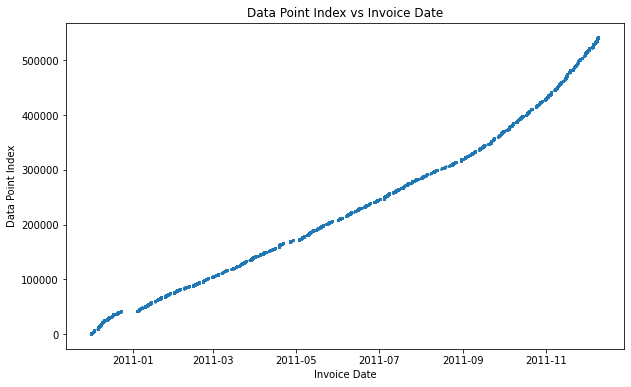

In [92]:
#mencari dari rentang waktu mana saja data data null ini terletak
df_null['InvoiceDate'] = pd.to_datetime(df_null['InvoiceDate'])
df_null['InvoiceDate'].min(), df_null['InvoiceDate'].max()

#membuat visualisasi persebaran nya, dengan x sebaagi datetimenya dan y nya adalah data point nya
plt.figure(figsize=(10, 6))
plt.scatter(df_null['InvoiceDate'], df_null.index, s=2)
plt.xlabel('Invoice Date')
plt.ylabel('Data Point Index')
plt.title('Data Point Index vs Invoice Date')
plt.show()


In [99]:
df_null['InvoiceDate'] = pd.to_datetime(df_null['InvoiceDate'], errors='coerce')

# Filter baris yang memiliki nilai null pada kolom InvoiceDate
df_null_filtered = df_null[df_null['InvoiceDate'].notnull()]

# Cari rentang waktu dari data yang tidak null
min_date = df_null_filtered['InvoiceDate'].min()
max_date = df_null_filtered['InvoiceDate'].max()

print(f"Rentang waktu data null: {min_date} sampai {max_date}")

# Membuat visualisasi dengan Plotly
fig = px.scatter(df_null_filtered, x='InvoiceDate', y=df_null_filtered.index,
                 labels={'InvoiceDate': 'Invoice Date', 'index': 'Data Point Index'},
                 title='Data Point Index vs Invoice Date (Data Null)',
                 width=800, height=500)

# Tambahkan slider untuk rentang waktu
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1d", step="day", stepmode="backward"),
                dict(count=7, label="1w", step="day", stepmode="backward"),
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.update_traces(marker=dict(size=5))

fig.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_19976\3417487382.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Rentang waktu data null: 2010-12-01 11:52:00 sampai 2011-12-09 10:26:00


### Cek pattern hari null, jam null

C:\Users\ACER\AppData\Local\Temp\ipykernel_19976\1394761907.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ACER\AppData\Local\Temp\ipykernel_19976\1394761907.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



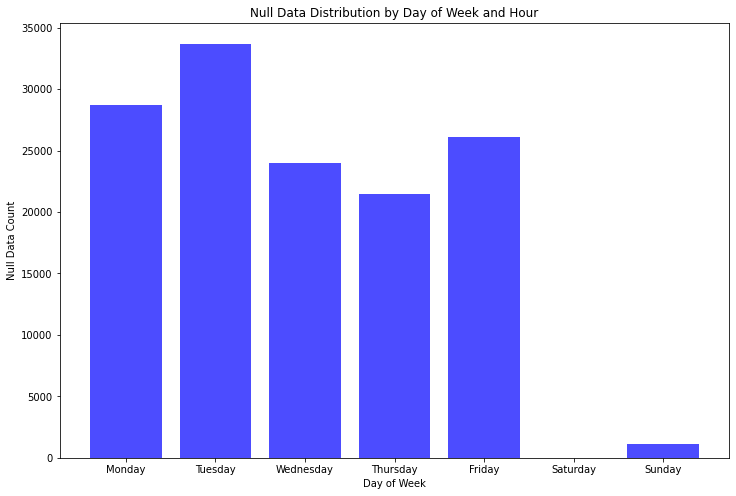

In [101]:

df_null['dayofweek'] = df_null['InvoiceDate'].dt.dayofweek
df_null['hour'] = df_null['InvoiceDate'].dt.hour

null_count = df_null.groupby(['dayofweek']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))
plt.bar(null_count['dayofweek'], null_count['count'], align='center', color='blue', alpha=0.7)

plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.xlabel('Day of Week')
plt.ylabel('Null Data Count')
plt.title('Null Data Distribution by Day of Week and Hour')
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_19976\2250632107.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ACER\AppData\Local\Temp\ipykernel_19976\2250632107.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



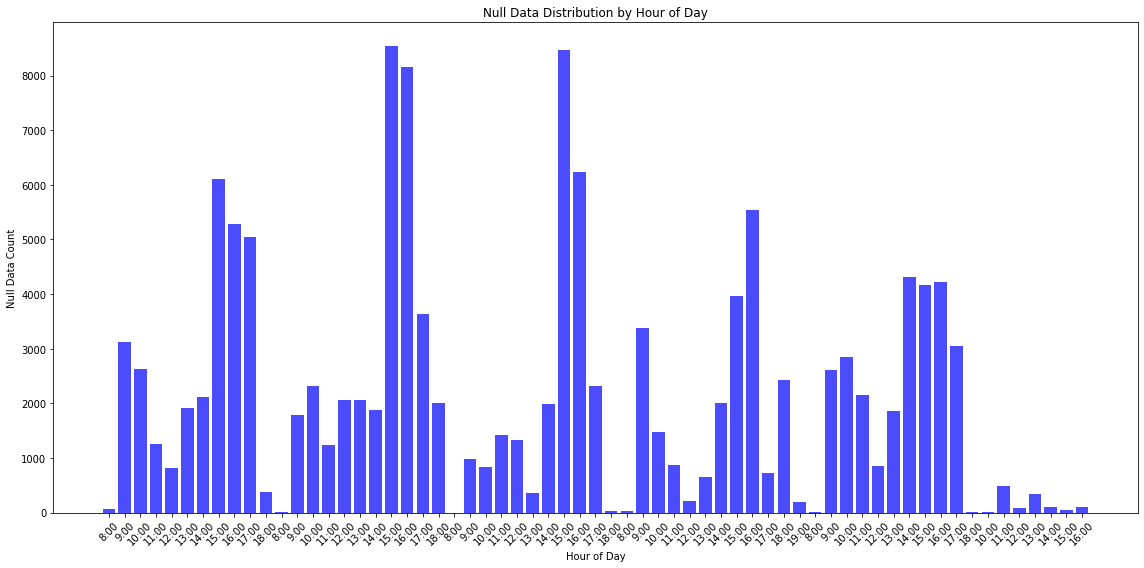

In [103]:
df_null['dayofweek'] = df_null['InvoiceDate'].dt.dayofweek
df_null['hour'] = df_null['InvoiceDate'].dt.hour

null_count = df_null.groupby(['dayofweek', 'hour']).size().reset_index(name='count')

plt.figure(figsize=(16, 8))
plt.bar(range(len(null_count)), null_count['count'], align='center', color='blue', alpha=0.7)

plt.xticks(range(len(null_count)), ['{}:00'.format(hour) for hour in null_count['hour']], rotation=45)

plt.xlabel('Hour of Day')
plt.ylabel('Null Data Count')
plt.title('Null Data Distribution by Hour of Day')
plt.tight_layout()
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_19976\3854394174.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ACER\AppData\Local\Temp\ipykernel_19976\3854394174.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



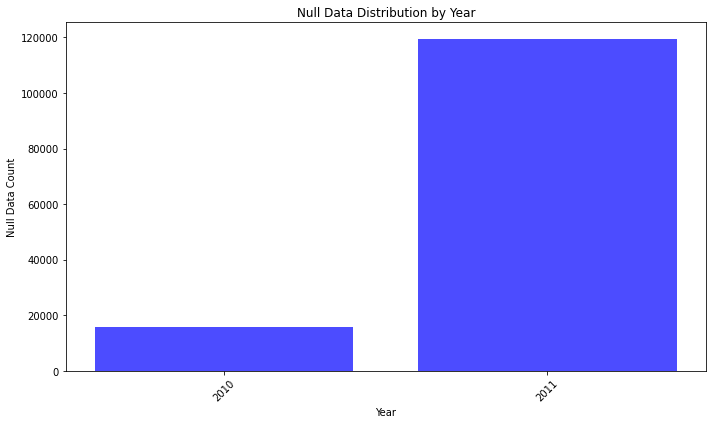

In [107]:

df_null['InvoiceDate'] = pd.to_datetime(df_null['InvoiceDate'])


df_null['year'] = df_null['InvoiceDate'].dt.year


null_count = df_null.groupby('year').size().reset_index(name='count')

plt.figure(figsize=(10, 6))
plt.bar(null_count['year'], null_count['count'], align='center', color='blue', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Null Data Count')
plt.title('Null Data Distribution by Year')


plt.xticks(range(2010, max(null_count['year']) + 1), rotation=45)

plt.tight_layout()
plt.show()

Alasan? next

In [106]:
df.InvoiceDate

0          12/1/2010 8:26
1          12/1/2010 8:26
2          12/1/2010 8:26
3          12/1/2010 8:26
4          12/1/2010 8:26
               ...       
541904    12/9/2011 12:50
541905    12/9/2011 12:50
541906    12/9/2011 12:50
541907    12/9/2011 12:50
541908    12/9/2011 12:50
Name: InvoiceDate, Length: 541909, dtype: object

### Note : Memilih drop untuk null datas, karena hipotesisi ini seharusnya divalidasi dengan pemilik data 

In [108]:
df_nonull = df.dropna(axis = 0)

In [109]:
df_nonull.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# Data Analytics and Explorations

## Cek deskripsi untuk tiap data - Continuous

In [115]:
df_nonull.describe()

#data untuk quantity, uniprice ada yang minus -> ini dikarenakan karena ada cancel product 

Quantity      UnitPrice     CustomerID
count  406829.000000  406829.000000  406829.000000
mean       12.061303       3.460471   15287.690570
std       248.693370      69.315162    1713.600303
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13953.000000
50%         5.000000       1.950000   15152.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000   38970.000000   18287.000000

## Cek untuk data tipe kategorikal

In [111]:
category = []
for i in df_null.columns:
    if df_nonull[i].dtype == 'object':
        category.append(i)

In [112]:
category

['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country']

In [116]:
#cek nilai uniquenya terlebih dahulu
for i in df_nonull.columns:
    print(f"Kolom: {i}")
    unique_values = df[i].unique()
    if i != "InvoiceNo" and i != "StockCode":
        for unik in unique_values:
            pass
            # print(unik)

Kolom: InvoiceNo
Kolom: StockCode
Kolom: Description
Kolom: Quantity
Kolom: InvoiceDate
Kolom: UnitPrice
Kolom: CustomerID
Kolom: Country


## Cek jumlah keunikan valuenya 

### Unique day

In [117]:
df_nonull['InvoiceDate'] = pd.to_datetime(df_nonull['InvoiceDate'])
unique_days = df_nonull['InvoiceDate'].dt.day_name().unique()
print(unique_days)

#saturday memang tidak ada disini, makanya ada space dan beberapa pattern tidak ada
#ini bisa terjadi karnea perusahan itdak memproses atau mencatat transaksi pada akhir pekan (di hari sabtu), atau pla pembeleian konsumne di akahir pekan tidak bsia , bisa juga tergantung zona waktu, ada juga bisa terjaid karena keterbatasan data. 

['Wednesday' 'Thursday' 'Friday' 'Sunday' 'Monday' 'Tuesday']


C:\Users\ACER\AppData\Local\Temp\ipykernel_19976\1839856794.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Unique Hour

In [119]:
unique_hours = df_nonull['InvoiceDate'].dt.hour_name().unique()
print(unique_hours)

AttributeError: 'DatetimeProperties' object has no attribute 'hour_name'

### Unique Country 

In [120]:
df.Country.nunique()

38

In [121]:
df.Country.value_counts()
#mulai dari uk sampai ke saudia arabia 

# ini ada 

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

# Analisis Penjualan

## 1. Penjualan berasal dari benua mana, lebih spesfiknya country mana?

## 2. Barang apa yang banyak terjual untuk semua country, lalu difilter based dari benua dan spesifik countrynya

## 3. Berapa proyeksi penjualan kita dari tahun ke tahun untuk semua penjualan, filter dari benua , dan filter dari country

## 4. Berkaitan dengan cancel, mana produk yang paling banyak di cancel untuk semua data penjualan, lalu based dari benu dan spesifik countrynya (sekalian dengan jumlahnya)

## 5. Berkaitan dengan cancel, negara mana yang banyak terjadi cancel?

## 6. Berkaitan dengan Product Quantity, berapa banyak produk yang banyak terbeli sepanjang penjualan ini dari tahun 2010 sampai tahun 2011?

## 7. Berkaitan dengan Unit Price, top 10 produk yang lebih mahal dibandingkan dengan produk lainnya? Dan berapa persenan penjualan produk tersebut dibandingkan seluruh penjualan yang ada di tiap tempat, benua, dan country? (Berarti top 10 nya stay as paling tinggi untuk setiap tempat)

## 8. Berkaitan dengan waktu, apakah ada pattern untuk barang yang dibeli untuk tiap bulannya untuk keseluruhan tempat, dan country? Baik di month maupun day maupun jam. 

# Analisis Pelanggan

## 1. Machine learning - Melakukan segmentasi pelanggan

## 2. RFM Analysis (Recency, Frequency, Monetary) : Mengukur seberapa baru, seberapa sering, dan seberapa banyak pelanggan berbelanja.


## 3. Lifetime Value (LTV) Mengihitung nilai total yang diperkirakan akan dihasilkan oleh pelanggan selama masa hidup merka sebagai pelanggan

In [ ]:
#nilai dari invoice no sudah pasti unik
#stock code juga
# for i in df.Description:
#     print(i)
df.Description.nunique()

4223

In [ ]:
df.Quantity.nunique()

722

In [ ]:
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [ ]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate) 

In [ ]:
df.InvoiceDate
#min dari 2010-12-01 08:26:00 dan max dari 2011-12-09 12:50:00

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [ ]:
df.UnitPrice.nunique() #dari minus karena cancel samapi maxnya 389

1630

array([[<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'UnitPrice'}>],
       [<AxesSubplot:title={'center':'CustomerID'}>, <AxesSubplot:>]],
      dtype=object)

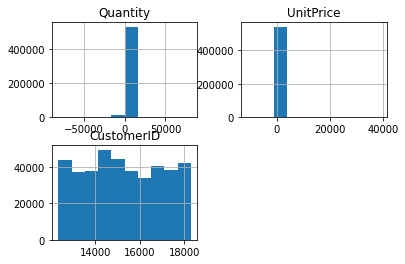

In [ ]:
df.hist()

Cek konsistensi, dari keterangan data kalau cancel 